In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
sns.set()
colors = sns.color_palette("husl")

### 数据构造

In [2]:
from sklearn.datasets import make_blobs

In [34]:
# n_samples    有多少行数据
# n_features   有多少个特征
# centers      结果分为多少类
# cluster_stdl 离散程度
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=2)

X_shape:(150, 2)
y:[0 2 1 2 0 2 2 0 2 2 1 1 1 0 2 0 0 2 0 2 1 2 1 0 0 2 2 2 1 1 1 2 1 1 2 1 1
 1 1 0 0 0 2 2 2 1 0 0 2 2 0 0 2 2 0 2 0 0 2 0 2 0 2 1 2 2 2 2 2 0 1 1 0 1
 0 0 1 0 1 1 1 2 0 2 0 0 1 0 1 1 1 0 0 1 2 1 0 2 2 2 0 2 0 1 0 1 0 0 2 1 1
 2 0 1 0 2 2 1 0 0 2 1 2 0 1 0 2 1 2 0 2 0 1 2 0 1 2 1 1 0 1 1 1 1 0 1 1 0
 2 1]


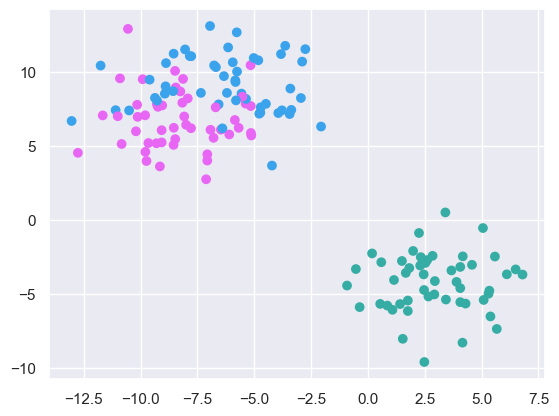

In [35]:
cm = ListedColormap(colors[3:])
print(f"X_shape:{X.shape}\ny:{y}")
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)

### 绘制分类边界

In [36]:
xmin,xmax = X[:,0].min(),X[:,0].max()
ymin,ymax = X[:,1].min(),X[:,1].max()

x_lin = np.linspace(xmin,xmax,120)
y_lin = np.linspace(ymin,ymax,120)

# 网格交叉处理
xx,yy = np.meshgrid(x_lin,y_lin)

# 扁平处理,及联
X_test = np.c_[xx.ravel(),yy.ravel()]

X_test

array([[-13.03018459,  -9.61064644],
       [-12.86354902,  -9.61064644],
       [-12.69691344,  -9.61064644],
       ...,
       [  6.46617762,  13.09216635],
       [  6.63281319,  13.09216635],
       [  6.79944877,  13.09216635]])

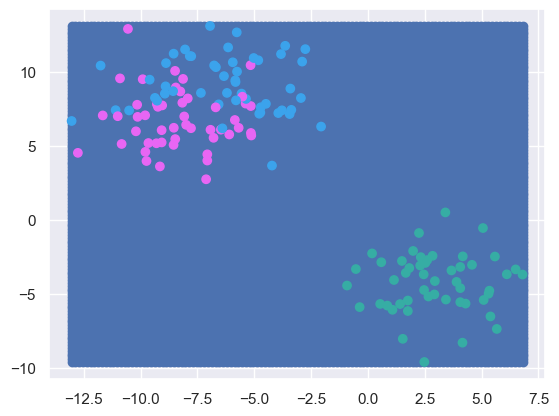

In [37]:
plt.scatter(X_test[:,0],X_test[:,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [39]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

lr.fit(X,y)
knn.fit(X,y)

lr_y_ = lr.predict(X_test)
knn_y_ = knn.predict(X_test)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


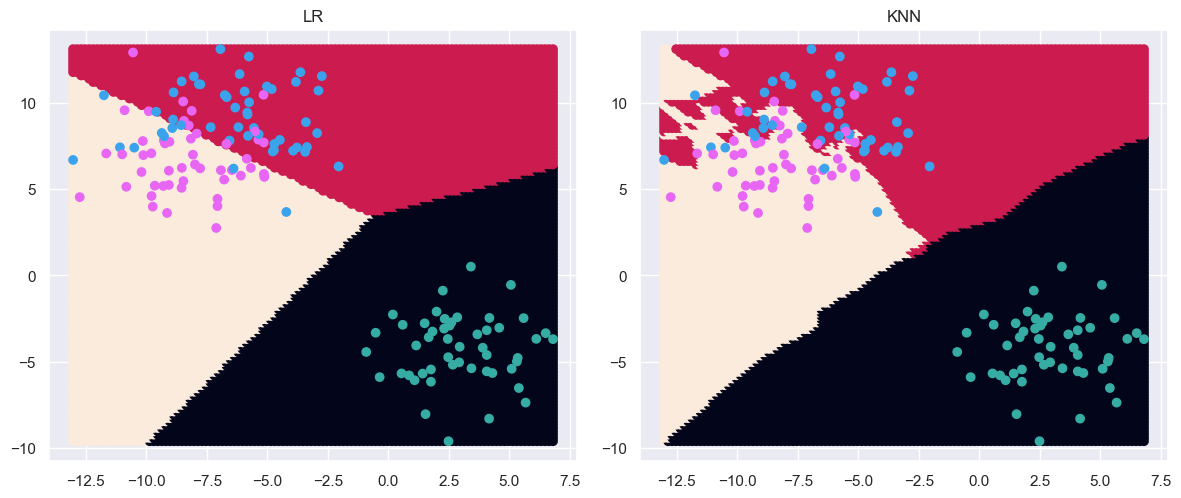

In [41]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
fig.tight_layout()
axs[0].scatter(X_test[:,0],X_test[:,1],c=lr_y_)
axs[0].scatter(X[:,0],X[:,1],c=y,cmap=cm)
axs[0].set_title("LR")

axs[1].scatter(X_test[:,0],X_test[:,1],c=knn_y_)
axs[1].scatter(X[:,0],X[:,1],c=y,cmap=cm)
axs[1].set_title("KNN")

plt.show()